# Project 2
Lieb Mathieson

#### Instructions
Combine your RGB to HSV function from Assignment 2 with the nested pixel loop example from Module 2.  Pixel by pixel loop through the RGB image and convert it to HSV.  Your function should now take a full RGB image and return an image converted to HSV.  Finally, replace the Open CV function (cv2.cvtColor()) in your image pipeline with the new function you created.  Submit your function and pipeline in one Jupyter Notebook.  (note: your function will have a slower run time)
#### Extra Credit (10 pts.)
Create a BGR to RGB function and apply it to your pipeline.  Submit one Jupyter Notebook for with both functions and your pipeline.
Do you own work and name your files correctly!  Points will be taken off from now on.

## Helper Function Zone:

In [64]:
import cv2
import numpy as np
from numpy import interp

### BGR to RGB


In [65]:
# BGR -> RGB func.

def bgr_to_rgb(img_bgr):
    # This function takes in an image in BGR color-space and converts it to RGB color-space

    # Save the height and width.
    h = img_bgr.shape[0]
    w = img_bgr.shape[1]

    # Inspect dimensions
        #print(h, w)
    # For 'graeber.jpg', the dimensions are 1200 x 1200

    # Lets make an empty array to store our converted BGR to RGB values
    # This will ultimately become our RGB image.
    imgRGB = np.zeros((h, w, 3), dtype=np.uint8)

    # An alternative method would involve copying the original image and then -
    # converting it:
        #imgRGB = copy.deepcopy(img)


    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):

            # Grab BGR pixel value at each index and save in new variable
            bgr_pixel = img_bgr[y, x]

            # Swap blue and red channels to convert 'B','G','R' to 'R','G','B'
            rgb_pixel = [bgr_pixel[2], bgr_pixel[1], bgr_pixel[0]]

            # Place value in new copy: imgRGB
            imgRGB[y,x] = rgb_pixel
    return(imgRGB)


### RBG to BGR

In [66]:
# RGB -> BGR func.
def rgb_to_bgr(img_rgb):
    # This function takes in an image in RGB color-space and converts it to BGR color-space

    # Save the height and width.
    h = img_rgb.shape[0]
    w = img_rgb.shape[1]

    # Inspect dimensions
        #print(h, w)
    # For 'graeber.jpg', the dimensions are 1200 x 1200
    # For Dali, 

    # Lets make an empty array to store our converted RGB to BGR values
    # This will ultimately become our BGR image.
    imgBGR = np.zeros((h, w, 3), dtype=np.uint8)

    # An alternative method would involve copying the original image and then -
    # converting it:
        #imgBGR = copy.deepcopy(img_rgb)


    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):

            #Grab RGB pixel value at each index and save in new variable
            rgb_pixel = img_rgb[y, x]

            #Swap blue and red channels to convert 'R','G','B' to 'B','G','R' 
            bgr_pixel = [rgb_pixel[2], rgb_pixel[1], rgb_pixel[0]]

            #place value in new copy: imgRGB
            imgBGR[y,x] = bgr_pixel
    return(imgBGR)



### RGB 1D-array to HSV 1D-array
helper function RGB to HSV
copy-pasted from Assignment1

In [67]:

def rgb_to_hsv_arr(rgb):
    # Input: rgb is an 1-D array [r,g,b] with values in range [0,255]. 
    # r = rgb[0], b = rgb[1], g = rgb[2]
    # Output: hsv is an 1-D array [h,s,v] with values in range h = [0,360], s = [0,1], v = [0,1].

    # Normalize color values.  Convert to floating point values between 0 - 1
    rgb = rgb/255

    # Initialize HSV
    h,s,v = 0.0, 0.0, 0.0

    # Find the max and min RGB values. 
    v = np.max(rgb)
    vMin = np.min(rgb)

    # Set the saturation value.
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    # Calculate (v - vMin) convenience
    diff = (v - vMin)

    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal. 
    if(rgb[0] == rgb[1] and rgb[1] == rgb[2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0] == v):
        h = 60 * (rgb[1] - rgb[2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[1] == v):
        h = 120 + 60 * (rgb[2] - rgb[0]) / diff
    # Is the point within +/- 60 degrees of the blue axis
    elif(rgb[2] == v):
        h = 240 + 60 * (rgb[0] - rgb[1]) / diff
    
    h= round(h/2)
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))

    # Return hsv values.
    return np.array([h,s,v])


### RGB to HSV

In [68]:
def rgb_to_hsv_im(img_rgb):

    #Save the height and width.
    h = img_rgb.shape[0]
    w = img_rgb.shape[1]

    imgHSV = np.zeros((h, w, img_rgb.shape[2]), dtype=np.uint8)

    # For each row in our grid
    for y in range(0,h):
        # Search each pixel in the row
        for x in range(0,w):
            
            # Grab RGB pixel
            rgb_pixel = img_rgb[y, x]

            # Convert rgb array to hsv array with helper function
            hsv_pixel = rgb_to_hsv_arr(rgb_pixel)
            
            # Apply converted pixel to new image
            imgHSV[y, x] = hsv_pixel

    return(imgHSV)



# Image Pipeline
Import image into Jupyter Notebook

Image is imported in BGR color-space by default.

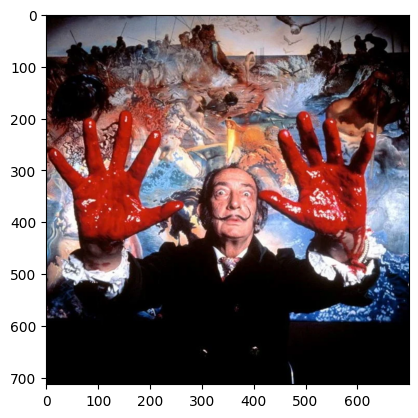

In [76]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Saving the image in a variable img
# img = cv2.imread("Images/graeber.jpeg")
img = cv2.imread('Images/salvador-dali-red-hands.jpeg')


# Use matplotlib while using a python notebook. Draw the image.
# Image will appear in BGR before conversion
img = bgr_to_rgb(img)
plt.imshow(img)

Convert back to BGR and grab a rectangular selection of subject's face for masking

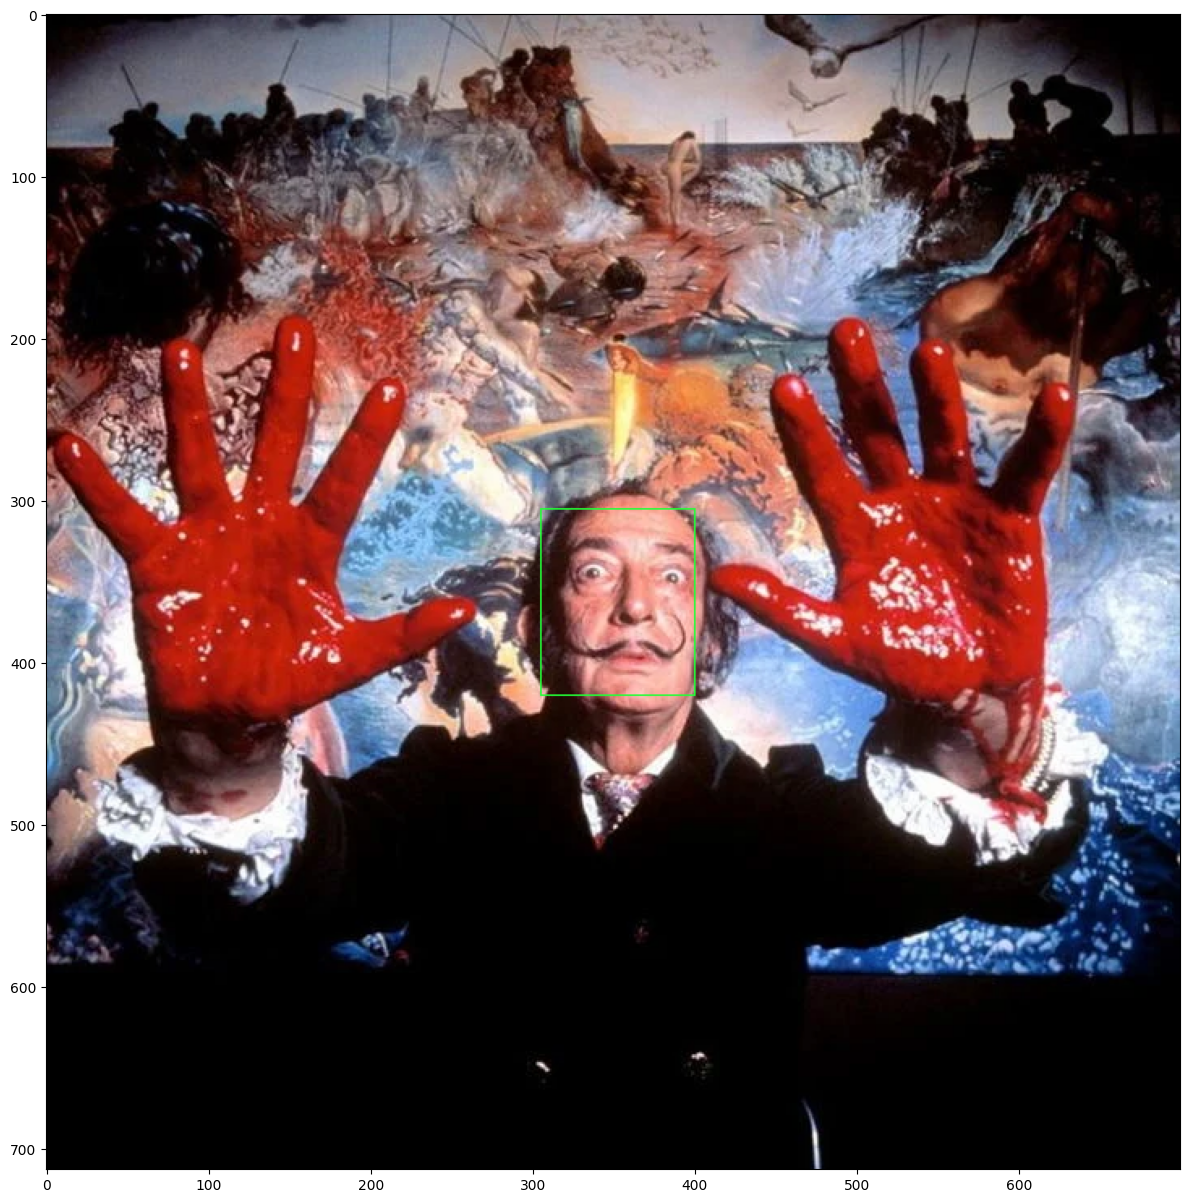

In [77]:
# first step: reverse above BGR -> RGB conversion with the function above
img_BGR = rgb_to_bgr(img)    

# Top left of rectangle
top_left = (305, 305)

# Bottom right of rectangle
bottom_right = (400, 420)

# Color
rect_color = (55, 255, 35)

# Thickness of line
thickness = 1

# Apply rectangle
img_rect = cv2.rectangle(img_BGR, top_left, bottom_right, rect_color, thickness)

# Convert back to RGB
img_rect = bgr_to_rgb(img_BGR)

# Make image larger on plot.
fig = plt.figure(figsize=(15,15))

# Plot image
plt.imshow(img_rect)


### Masking Time!

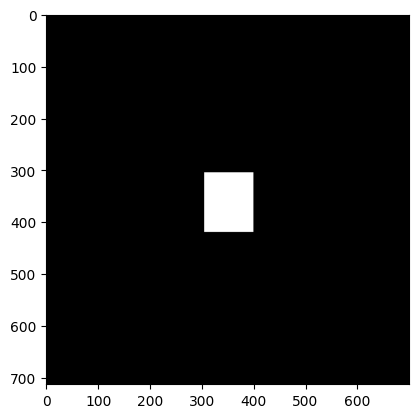

In [78]:
# # Top left of rectangle
# top_left = (305, 305)

# # Bottom right of rectangle
# bottom_right = (400, 420)

# Create a black mask.
mask = np.zeros(img.shape[:2], np.uint8)

# Add the white portion of the mask.
mask[305:420, 305:400] = 255 # 255 = white

# Plot maks
plt.imshow(mask, cmap="gray")

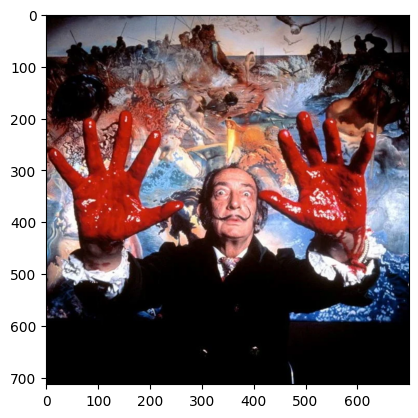

In [79]:
# Reimport image
# img = cv2.imread("Images/graeber.jpeg", 1)
img = cv2.imread("Images/salvador-dali-red-hands.jpeg", 1)
img = bgr_to_rgb(img)
plt.imshow(img)

In [80]:
# Convert img to HSV
img = rgb_to_hsv_im(img)

### Histogram zone
(recycled code from Module1_project.ipynb)

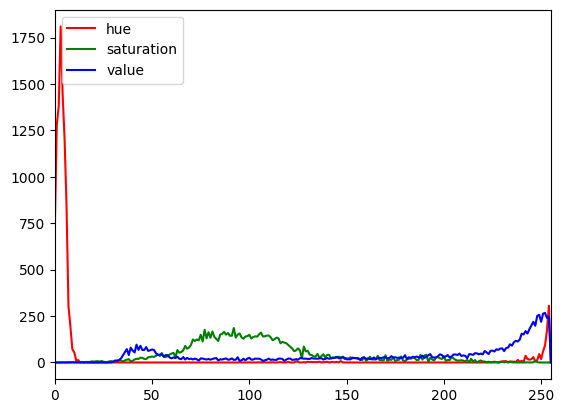

In [81]:
# Plot the hue.
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

# Plot the saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

# Plot the value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show()


### Final Masked Image

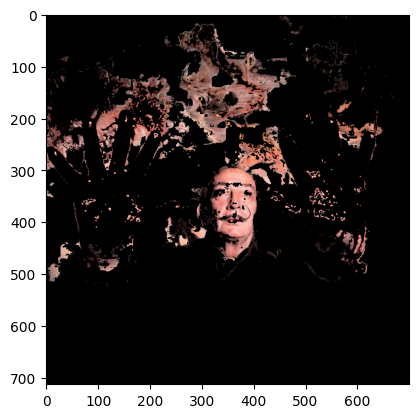

In [83]:
# Minimum and maximum HSV values.
min_HSV = np.array([0,50,35], np.uint8)
max_HSV = np.array([10,150,255], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Plot masked image.
plt.imshow(skinHSV)